In [1]:
import numpy as np
from zephyr.backend import MultiFreq, MiniZephyr, MiniZephyr25D, SparseKaiserSource

In [2]:
systemConfig = {
    'dx':       1.,                     # m
    'dz':       1.,                     # m
    'c':        2500.,                  # m/s
    'rho':      1.,                     # kg/m^3
    'nx':       100,                    # count
    'nz':       200,                    # count
    'freqs':    np.arange(50, 450, 50), # Hz
    
    # 2D Problem
    'Disc':     MiniZephyr,             # discretization
    'parallel': True,
    
#     # 2.5D Problem
#     'disc':     MiniZephyr25D,          # discretization
#     'parallel': False,
#     'nky':      80,
}

In [3]:
mf = MultiFreq(systemConfig)
mf.subProblems

In [4]:
sks = SparseKaiserSource(systemConfig)

In [5]:
q = sks(np.array([[25, 25],[50, 40]]))

In [6]:
q

<20000x2 sparse matrix of type '<type 'numpy.complex128'>'
	with 162 stored elements in COOrdinate format>

In [7]:
%time
us = [u for u in mf*q]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


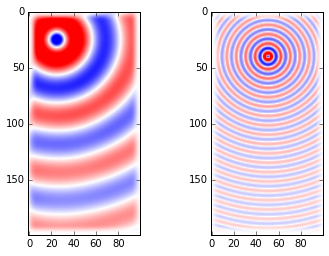

In [9]:
clip = 0.1

plotOpts = {
    'vmin': -clip,
    'vmax': clip,
    'cmap': cm.bwr
}

subplot(1,2,1)
imshow(us[0][:,0].reshape((200,100)).real, **plotOpts)

subplot(1,2,2)
imshow(us[5][:,1].reshape((200,100)).real, **plotOpts)